In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sqlite3

In [2]:
dbcon = sqlite3.connect('booking_com.db')

In [3]:
cur = dbcon.cursor()

In [4]:
df1=pd.read_pickle("Data_Frame1.pkl")

In [5]:
df2=pd.read_pickle("Data_Frame2.pkl")

In [6]:
df3=pd.read_pickle("Data_Frame3.pkl")

In [7]:
df1

,Sno,Hotel Name,City,Location,No Of Reviews,User Rating
0,1,MySquare Apartments Shoredtich,London,"Avantgarde Place, Tower Hamlets, London, E1 6G...","· 7 reviews,",7.0
1,2,Daisy’s Place in London,London,"Nightingale Lane, London, E11 2EZ, United Kingdom","· 6 reviews,",10.0
2,3,The Park Road Collection,London,"Scott Ellis Gardens, Westminster Borough, Lond...",· 15 reviews,7.2
3,4,Kennington retreat with garden + king bed,London,"13 Chapter Road, Southwark, London, SE17 3ES, ...","· 10 reviews,",10.0
4,5,Shepherds Bush Apartment,London,"112 Goldhawk Road, Hammersmith and Fulham, Lon...","· 17 reviews,",7.2
...,...,...,...,...,...,...
3013,296,Granz Okubo 1F,Tokyo,"169-0072 Tokyo-to, 新宿区大久保１−５−５, Japan",· 23 reviews,9.7
3014,297,全新3居室！距离池袋C2出口5分钟！,Tokyo,"171-0021 Tokyo-to, 東京都豊島区西池袋5-26-23 東京都豊島区西池袋5...","· 6 reviews,",8.0
3015,298,Shinjuku Backyard for 4 guests,Tokyo,"162-0055 Tokyo-to, Yochōmachi 13-13, Japan","· 10 reviews,",8.0
3016,299,Shinjuku Central Apartment 203,Tokyo,"162-0054 Tokyo-to, Shinjuku-ku Kawadacho 7-7, ...","· 2 reviews,",10.0


In [8]:
df2

,Sno,Hotel Name,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3
0,1,MySquare Apartments Shoredtich,No,No,No,-,-,No,No,-,-,-
1,2,Daisy’s Place in London,Yes,No,No,-,-,No,No,-,-,-
2,3,The Park Road Collection,Yes,Yes,Yes,RestaurantSara Falafel,-,No,No,-,-,-
3,4,Kennington retreat with garden + king bed,Yes,Yes,Yes,-,-,No,No,-,-,-
4,5,Shepherds Bush Apartment,No,No,No,-,-,No,No,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...
2769,296,Granz Okubo 1F,No,No,No,-,-,No,No,-,-,-
2770,297,全新3居室！距离池袋C2出口5分钟！,No,No,No,-,-,Yes,Yes,-,-,-
2771,298,Shinjuku Backyard for 4 guests,No,No,No,-,-,Yes,No,-,-,-
2772,299,Shinjuku Central Apartment 203,Yes,Yes,Yes,-,-,No,No,-,-,-


In [9]:
df3

,Sno,Hotel Name,Room Type,Single Bed,Double Bed,Price
0,1,MySquare Apartments Shoredtich,Delux King Room,Yes,No,6765
1,2,Daisy’s Place in London,Standard Twin,Yes,No,5866
2,3,The Park Road Collection,Standard Twin,No,Yes,3174
3,4,Kennington retreat with garden + king bed,Standard Twin,No,Yes,9218
4,5,Shepherds Bush Apartment,Standard Double,Yes,No,8492
...,...,...,...,...,...,...
2823,296,Granz Okubo 1F,Delux King Room,Yes,No,7744
2824,297,全新3居室！距离池袋C2出口5分钟！,Delux King Room,No,Yes,5179
2825,298,Shinjuku Backyard for 4 guests,Standard Twin,No,Yes,9279
2826,299,Shinjuku Central Apartment 203,Delux King Room,No,Yes,4957


## Merging df1, df2, df3 into a single df

In [10]:
# Rename the 'Sno' column in df1 to 'Sno_df1'
df1 = df1.rename(columns={'Sno': 'Sno_df1'})

# Merge df1, df2, and df3 based on 'Hotel Name'
merged_df = pd.merge(df1, df2, on='Hotel Name', how='inner')
final_merged_df = pd.merge(merged_df, df3, on='Hotel Name', how='inner')

# Rename the 'Sno_df1' column back to 'Sno'
final_merged_df = final_merged_df.rename(columns={'Sno_df1': 'Sno'})

# Print the final merged DataFrame
print(final_merged_df)

     Sno                                 Hotel Name    City  \
0      1             MySquare Apartments Shoredtich  London   
1      2                    Daisy’s Place in London  London   
2      3                   The Park Road Collection  London   
3      4  Kennington retreat with garden + king bed  London   
4      5                   Shepherds Bush Apartment  London   
..   ...                                        ...     ...   
295  296                             Granz Okubo 1F   Tokyo   
296  297                         全新3居室！距离池袋C2出口5分钟！   Tokyo   
297  298             Shinjuku Backyard for 4 guests   Tokyo   
298  299             Shinjuku Central Apartment 203   Tokyo   
299  300     Hostel HIDEAWAY - Vacation STAY 23868v   Tokyo   

                                              Location  No Of Reviews  \
0    Avantgarde Place, Tower Hamlets, London, E1 6G...   · 7 reviews,   
1    Nightingale Lane, London, E11 2EZ, United Kingdom   · 6 reviews,   
2    Scott Ellis Gardens

In [11]:
df=final_merged_df
df

,Sno,Hotel Name,City,Location,No Of Reviews,User Rating,Sno_x,Free WIFI,Family Rooms,Non Smoking Rooms,...,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Sno_y,Room Type,Single Bed,Double Bed,Price
0,1,MySquare Apartments Shoredtich,London,"Avantgarde Place, Tower Hamlets, London, E1 6G...","· 7 reviews,",7.0,1,No,No,No,...,No,No,-,-,-,1,Delux King Room,Yes,No,6765
1,2,Daisy’s Place in London,London,"Nightingale Lane, London, E11 2EZ, United Kingdom","· 6 reviews,",10.0,2,Yes,No,No,...,No,No,-,-,-,2,Standard Twin,Yes,No,5866
2,3,The Park Road Collection,London,"Scott Ellis Gardens, Westminster Borough, Lond...",· 15 reviews,7.2,3,Yes,Yes,Yes,...,No,No,-,-,-,3,Standard Twin,No,Yes,3174
3,4,Kennington retreat with garden + king bed,London,"13 Chapter Road, Southwark, London, SE17 3ES, ...","· 10 reviews,",10.0,4,Yes,Yes,Yes,...,No,No,-,-,-,4,Standard Twin,No,Yes,9218
4,5,Shepherds Bush Apartment,London,"112 Goldhawk Road, Hammersmith and Fulham, Lon...","· 17 reviews,",7.2,5,No,No,No,...,No,No,-,-,-,5,Standard Double,Yes,No,8492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Granz Okubo 1F,Tokyo,"169-0072 Tokyo-to, 新宿区大久保１−５−５, Japan",· 23 reviews,9.7,296,No,No,No,...,No,No,-,-,-,296,Delux King Room,Yes,No,7744
296,297,全新3居室！距离池袋C2出口5分钟！,Tokyo,"171-0021 Tokyo-to, 東京都豊島区西池袋5-26-23 東京都豊島区西池袋5...","· 6 reviews,",8.0,297,No,No,No,...,Yes,Yes,-,-,-,297,Delux King Room,No,Yes,5179
297,298,Shinjuku Backyard for 4 guests,Tokyo,"162-0055 Tokyo-to, Yochōmachi 13-13, Japan","· 10 reviews,",8.0,298,No,No,No,...,Yes,No,-,-,-,298,Standard Twin,No,Yes,9279
298,299,Shinjuku Central Apartment 203,Tokyo,"162-0054 Tokyo-to, Shinjuku-ku Kawadacho 7-7, ...","· 2 reviews,",10.0,299,Yes,Yes,Yes,...,No,No,-,-,-,299,Delux King Room,No,Yes,4957


In [12]:
df=df.drop("Sno_x",axis=1)
df=df.drop("Sno_y",axis=1)

In [13]:
def categorize_review_score(user_rating):
    if user_rating == 10:
        return 'Superb'
    elif user_rating >= 8:
        return 'Very Good'
    elif user_rating >= 6:
        return 'Good'
    else:
        return 'Pleasant'

# Apply the function to create the 'Review Score' column
df['Review Score'] = df['User Rating'].apply(categorize_review_score)

In [14]:
df

,Sno,Hotel Name,City,Location,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,...,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
0,1,MySquare Apartments Shoredtich,London,"Avantgarde Place, Tower Hamlets, London, E1 6G...","· 7 reviews,",7.0,No,No,No,-,...,No,No,-,-,-,Delux King Room,Yes,No,6765,Good
1,2,Daisy’s Place in London,London,"Nightingale Lane, London, E11 2EZ, United Kingdom","· 6 reviews,",10.0,Yes,No,No,-,...,No,No,-,-,-,Standard Twin,Yes,No,5866,Superb
2,3,The Park Road Collection,London,"Scott Ellis Gardens, Westminster Borough, Lond...",· 15 reviews,7.2,Yes,Yes,Yes,RestaurantSara Falafel,...,No,No,-,-,-,Standard Twin,No,Yes,3174,Good
3,4,Kennington retreat with garden + king bed,London,"13 Chapter Road, Southwark, London, SE17 3ES, ...","· 10 reviews,",10.0,Yes,Yes,Yes,-,...,No,No,-,-,-,Standard Twin,No,Yes,9218,Superb
4,5,Shepherds Bush Apartment,London,"112 Goldhawk Road, Hammersmith and Fulham, Lon...","· 17 reviews,",7.2,No,No,No,-,...,No,No,-,-,-,Standard Double,Yes,No,8492,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,Granz Okubo 1F,Tokyo,"169-0072 Tokyo-to, 新宿区大久保１−５−５, Japan",· 23 reviews,9.7,No,No,No,-,...,No,No,-,-,-,Delux King Room,Yes,No,7744,Very Good
296,297,全新3居室！距离池袋C2出口5分钟！,Tokyo,"171-0021 Tokyo-to, 東京都豊島区西池袋5-26-23 東京都豊島区西池袋5...","· 6 reviews,",8.0,No,No,No,-,...,Yes,Yes,-,-,-,Delux King Room,No,Yes,5179,Very Good
297,298,Shinjuku Backyard for 4 guests,Tokyo,"162-0055 Tokyo-to, Yochōmachi 13-13, Japan","· 10 reviews,",8.0,No,No,No,-,...,Yes,No,-,-,-,Standard Twin,No,Yes,9279,Very Good
298,299,Shinjuku Central Apartment 203,Tokyo,"162-0054 Tokyo-to, Shinjuku-ku Kawadacho 7-7, ...","· 2 reviews,",10.0,Yes,Yes,Yes,-,...,No,No,-,-,-,Delux King Room,No,Yes,4957,Superb


## EDA

In [15]:
df.head()

,Sno,Hotel Name,City,Location,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,...,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
0,1,MySquare Apartments Shoredtich,London,"Avantgarde Place, Tower Hamlets, London, E1 6G...","· 7 reviews,",7.0,No,No,No,-,...,No,No,-,-,-,Delux King Room,Yes,No,6765,Good
1,2,Daisy’s Place in London,London,"Nightingale Lane, London, E11 2EZ, United Kingdom","· 6 reviews,",10.0,Yes,No,No,-,...,No,No,-,-,-,Standard Twin,Yes,No,5866,Superb
2,3,The Park Road Collection,London,"Scott Ellis Gardens, Westminster Borough, Lond...",· 15 reviews,7.2,Yes,Yes,Yes,RestaurantSara Falafel,...,No,No,-,-,-,Standard Twin,No,Yes,3174,Good
3,4,Kennington retreat with garden + king bed,London,"13 Chapter Road, Southwark, London, SE17 3ES, ...","· 10 reviews,",10.0,Yes,Yes,Yes,-,...,No,No,-,-,-,Standard Twin,No,Yes,9218,Superb
4,5,Shepherds Bush Apartment,London,"112 Goldhawk Road, Hammersmith and Fulham, Lon...","· 17 reviews,",7.2,No,No,No,-,...,No,No,-,-,-,Standard Double,Yes,No,8492,Good


In [16]:
df.tail()

,Sno,Hotel Name,City,Location,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,...,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
295,296,Granz Okubo 1F,Tokyo,"169-0072 Tokyo-to, 新宿区大久保１−５−５, Japan",· 23 reviews,9.7,No,No,No,-,...,No,No,-,-,-,Delux King Room,Yes,No,7744,Very Good
296,297,全新3居室！距离池袋C2出口5分钟！,Tokyo,"171-0021 Tokyo-to, 東京都豊島区西池袋5-26-23 東京都豊島区西池袋5...","· 6 reviews,",8.0,No,No,No,-,...,Yes,Yes,-,-,-,Delux King Room,No,Yes,5179,Very Good
297,298,Shinjuku Backyard for 4 guests,Tokyo,"162-0055 Tokyo-to, Yochōmachi 13-13, Japan","· 10 reviews,",8.0,No,No,No,-,...,Yes,No,-,-,-,Standard Twin,No,Yes,9279,Very Good
298,299,Shinjuku Central Apartment 203,Tokyo,"162-0054 Tokyo-to, Shinjuku-ku Kawadacho 7-7, ...","· 2 reviews,",10.0,Yes,Yes,Yes,-,...,No,No,-,-,-,Delux King Room,No,Yes,4957,Superb
299,300,Hostel HIDEAWAY - Vacation STAY 23868v,Tokyo,"116-0003 Tokyo-to, 2-14-8 Minamisenju Hostel H...","· 5 reviews,",9.3,No,No,No,-,...,Yes,No,-,-,-,Standard Twin,Yes,No,5167,Very Good


In [17]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Sno,300
Hotel Name,300
City,12
Location,280
No Of Reviews,12
User Rating,16
Free WIFI,2
Family Rooms,2
Non Smoking Rooms,2
Resturant,54


In [18]:
df.dtypes   #Datatype of all the columns

Sno                     int64
Hotel Name             object
City                   object
Location               object
No Of Reviews          object
User Rating           float64
Free WIFI              object
Family Rooms           object
Non Smoking Rooms      object
Resturant              object
Bar                    object
Heating                object
Lift                   object
Breakfast Cusine 1     object
Breakfast Cusine 2     object
Breakfast Cusine 3     object
Room Type              object
Single Bed             object
Double Bed             object
Price                   int64
Review Score           object
dtype: object

In [19]:
df.shape  #Dimension of the dataset

(300, 21)

In [20]:
df.columns  #Names of all the columns in the dataset

Index(['Sno', 'Hotel Name', 'City', 'Location', 'No Of Reviews', 'User Rating',
       'Free WIFI', 'Family Rooms', 'Non Smoking Rooms', 'Resturant', 'Bar',
       'Heating', 'Lift', 'Breakfast Cusine 1', 'Breakfast Cusine 2',
       'Breakfast Cusine 3', 'Room Type', 'Single Bed', 'Double Bed', 'Price',
       'Review Score'],
      dtype='object')

In [21]:
df.columns.to_list()

['Sno',
 'Hotel Name',
 'City',
 'Location',
 'No Of Reviews',
 'User Rating',
 'Free WIFI',
 'Family Rooms',
 'Non Smoking Rooms',
 'Resturant',
 'Bar',
 'Heating',
 'Lift',
 'Breakfast Cusine 1',
 'Breakfast Cusine 2',
 'Breakfast Cusine 3',
 'Room Type',
 'Single Bed',
 'Double Bed',
 'Price',
 'Review Score']

In [22]:
df.isnull().sum() #Number of null values in each column

Sno                   0
Hotel Name            0
City                  0
Location              0
No Of Reviews         0
User Rating           0
Free WIFI             0
Family Rooms          0
Non Smoking Rooms     0
Resturant             0
Bar                   0
Heating               0
Lift                  0
Breakfast Cusine 1    0
Breakfast Cusine 2    0
Breakfast Cusine 3    0
Room Type             0
Single Bed            0
Double Bed            0
Price                 0
Review Score          0
dtype: int64

In [23]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sno                 300 non-null    int64  
 1   Hotel Name          300 non-null    object 
 2   City                300 non-null    object 
 3   Location            300 non-null    object 
 4   No Of Reviews       300 non-null    object 
 5   User Rating         300 non-null    float64
 6   Free WIFI           300 non-null    object 
 7   Family Rooms        300 non-null    object 
 8   Non Smoking Rooms   300 non-null    object 
 9   Resturant           300 non-null    object 
 10  Bar                 300 non-null    object 
 11  Heating             300 non-null    object 
 12  Lift                300 non-null    object 
 13  Breakfast Cusine 1  300 non-null    object 
 14  Breakfast Cusine 2  300 non-null    object 
 15  Breakfast Cusine 3  300 non-null    object 
 16  Room Typ

In [24]:
#checking the value counts of unique values in each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')  #new line

1      1
207    1
205    1
204    1
203    1
      ..
100    1
99     1
98     1
97     1
300    1
Name: Sno, Length: 300, dtype: int64


MySquare Apartments Shoredtich                                 1
FAM Living - Chic 1BR in Zada Tower near Dubai Mall & Metro    1
Anantara Residences Palm Jumeirah                              1
Fully Furnished Studio in JLT                                  1
Primestay - Bluewaters Residences 2BR, Dubai                   1
                                                              ..
Chambers Serviced Suites Kuala Lumpur                          1
Luxury Stay Platinum KLCC                                      1
Scarletz Suites KLCC Twin Tower by Purple Orchid               1
Bintang Lux B&B Suites Times Square Kl                         1
Hostel HIDEAWAY - Vacation STAY 23868v                         1
Name: Hotel Name, Length: 300, dtype: int64


Sydney        26
London        25
Manchester    25
Bermingam     25
Kualampur     25
New Delhi     25

<AxesSubplot:>

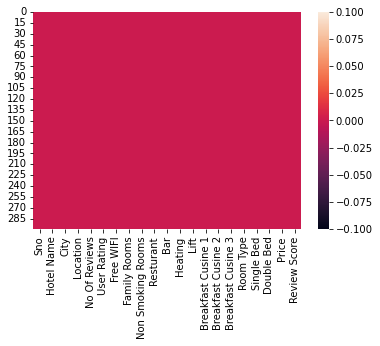

In [25]:
sns.heatmap(df.isnull())   # creating a heat map

In [26]:
#Heatmap is of single colour as there are no null values

In [27]:
df.describe()

,Sno,User Rating,Price
count,300.000000,300.000000,300.000000
mean,150.500000,8.155333,6445.866667
std,86.746758,1.385739,2025.873023
min,1.000000,4.500000,3011.000000
25%,75.750000,7.300000,4738.000000
50%,150.500000,8.500000,6266.000000
75%,225.250000,9.300000,8170.000000
max,300.000000,10.000000,9986.000000


In [28]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Sno,300
Hotel Name,300
City,12
Location,280
No Of Reviews,12
User Rating,16
Free WIFI,2
Family Rooms,2
Non Smoking Rooms,2
Resturant,54


No     169
Yes    131
Name: Free WIFI, dtype: int64


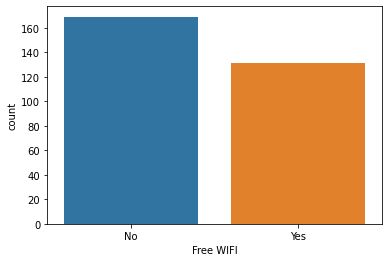

In [29]:
#Univariate Analysis
datamap=sns.countplot(df['Free WIFI'],data=df)
print(df['Free WIFI'].value_counts())

In [30]:
# we can observe many hotels are no having free wifi

No     164
Yes    136
Name: Family Rooms, dtype: int64


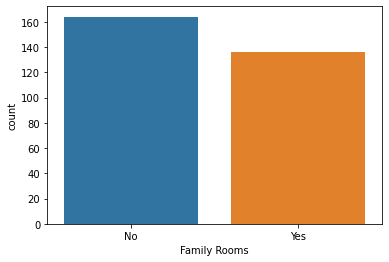

In [31]:
#Univariate Analysis
datamap=sns.countplot(df['Family Rooms'],data=df)
print(df['Family Rooms'].value_counts())

In [32]:
# we can no of hotels not having family room is slightly more than the hotel having family room

Delux King Room    82
Standard Double    76
Standard Twin      71
Double Room        71
Name: Room Type, dtype: int64


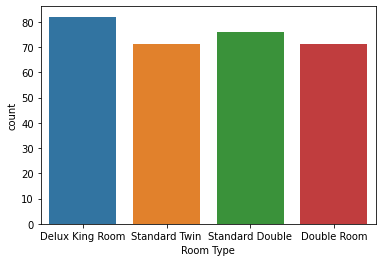

In [33]:
#Univariate Analysis
datamap=sns.countplot(df['Room Type'],data=df)
print(df['Room Type'].value_counts())

In [34]:
# we can see that room type is equaly divided in all

Yes    157
No     143
Name: Single Bed, dtype: int64


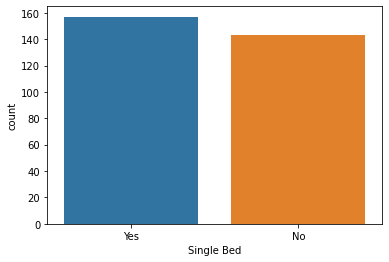

In [35]:
#Univariate Analysis
datamap=sns.countplot(df['Single Bed'],data=df)
print(df['Single Bed'].value_counts())

In [36]:
# We can observe that no of single bed hotel are more

Yes    215
No      85
Name: Double Bed, dtype: int64


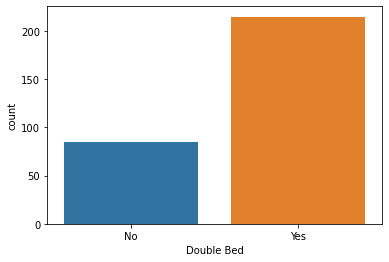

In [37]:
#Univariate Analysis
datamap=sns.countplot(df['Double Bed'],data=df)
print(df['Double Bed'].value_counts())

In [38]:
# we can observe that Mostly hotels are having double bed

<Figure size 1080x720 with 0 Axes>

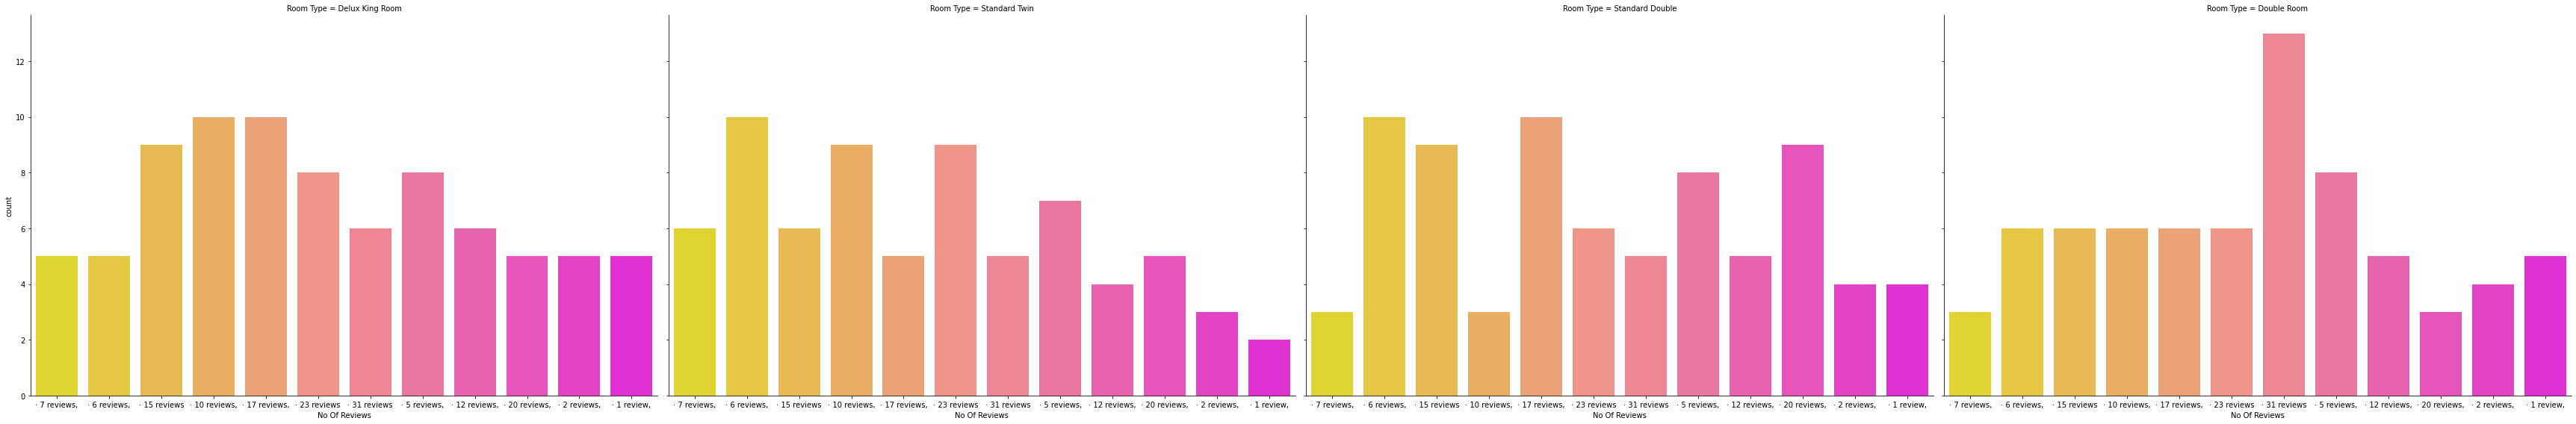

In [39]:
# Bivarient analysis

# Comparing Room Type on the base of No Of Reviews
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your requirements

sns.catplot(x='No Of Reviews', col='Room Type', data=df, kind='count', palette='spring_r', height=8, aspect=1.5)

plt.show()

<Figure size 1080x720 with 0 Axes>

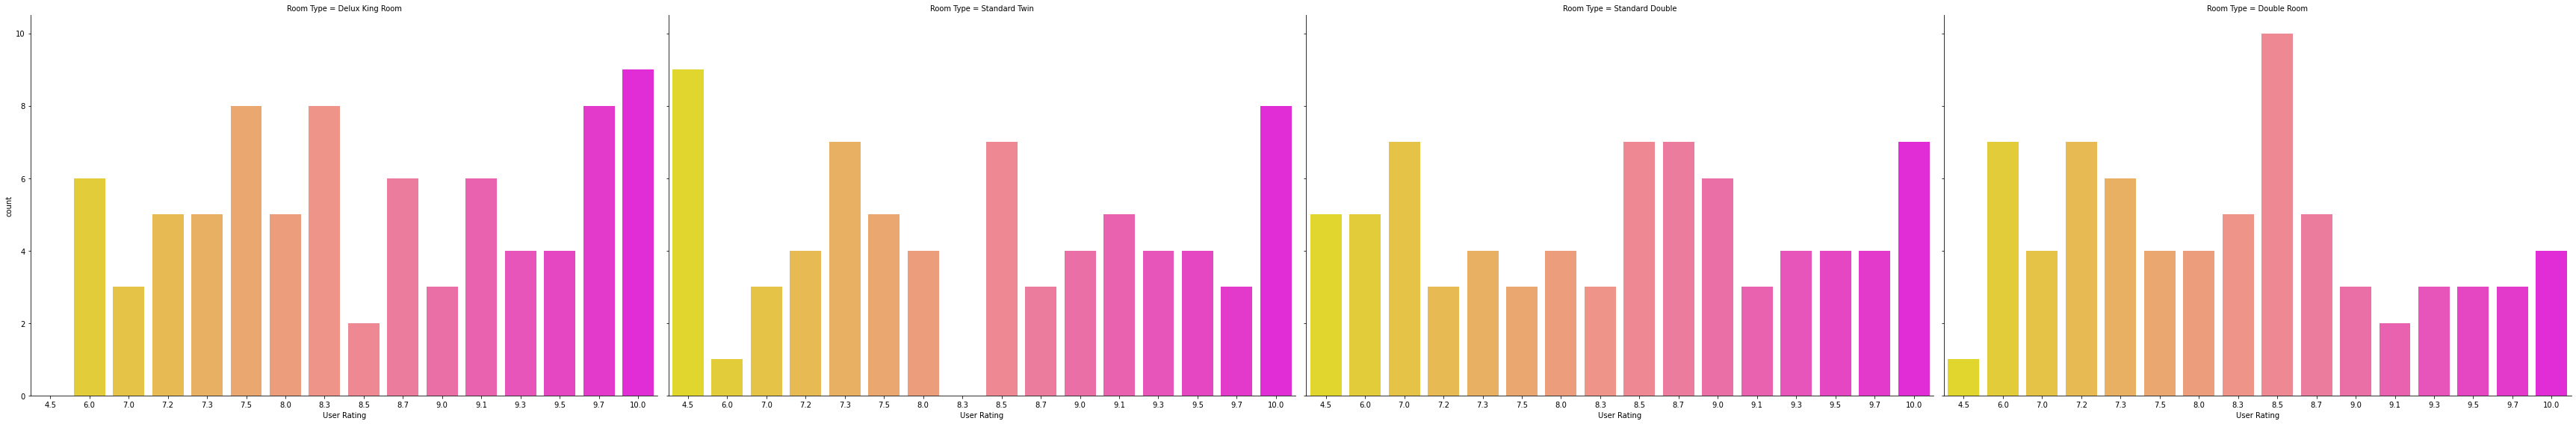

In [40]:
# Comparing Room Type on the base of No Of Reviews
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your requirements

sns.catplot(x='User Rating', col='Room Type', data=df, kind='count', palette='spring_r', height=8, aspect=1.5)

plt.show()

In [41]:
# delux room has the maximum number of 10 rating and stnadard twin room has the maximum no of 4.5 rating 

<Figure size 1080x720 with 0 Axes>

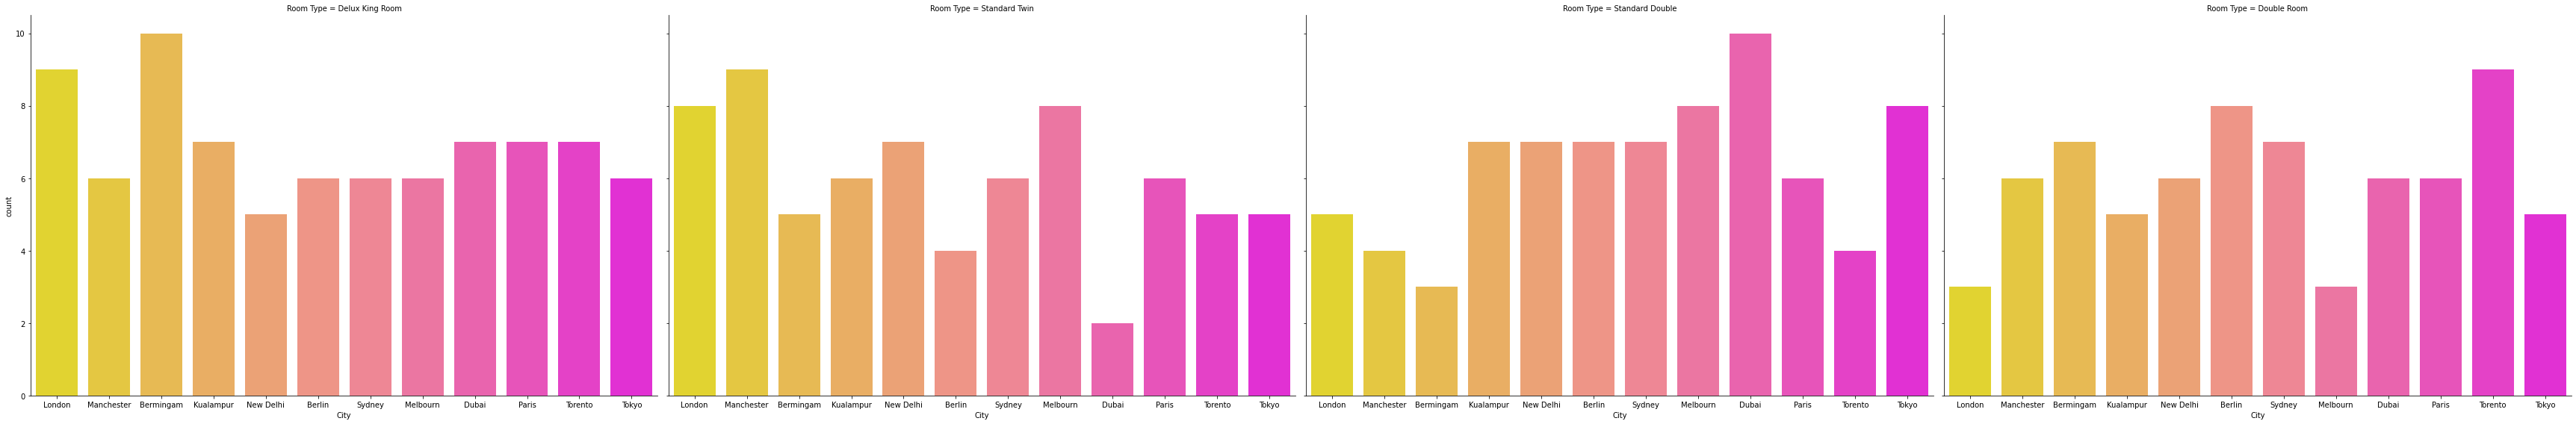

In [42]:
plt.figure(figsize=(15, 10))  # Adjust the figure size as per your requirements

sns.catplot(x='City', col='Room Type', data=df, kind='count', palette='spring_r', height=8, aspect=1.5)

plt.show()

In [43]:
# Bermingam has the most no of delux king room, Manchester has the most no of standard twin room,Dubai has the most no of Standard double room,Torento has the most Double room

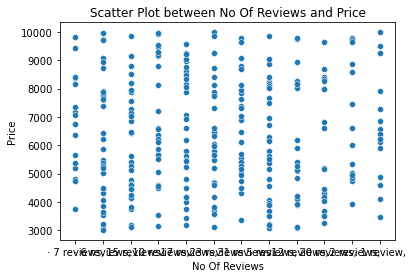

In [44]:
# Bivariate Analysis
# Create scatter plots for numerical correlations
sns.scatterplot(x='No Of Reviews', y='Price', data=df)
plt.title('Scatter Plot between No Of Reviews and Price')
plt.show()

In [45]:
#Seperating Numerical and categorical columns

categorical_col=[]
for i in df.columns:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:",categorical_col)
print('\n')

numerical_col=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:",numerical_col)
print("\n")

Categorical columns are: ['Hotel Name', 'City', 'Location', 'No Of Reviews', 'Free WIFI', 'Family Rooms', 'Non Smoking Rooms', 'Resturant', 'Bar', 'Heating', 'Lift', 'Breakfast Cusine 1', 'Breakfast Cusine 2', 'Breakfast Cusine 3', 'Room Type', 'Single Bed', 'Double Bed', 'Review Score']


Numerical columns are: ['Sno', 'User Rating', 'Price']




## Checking the outliers 

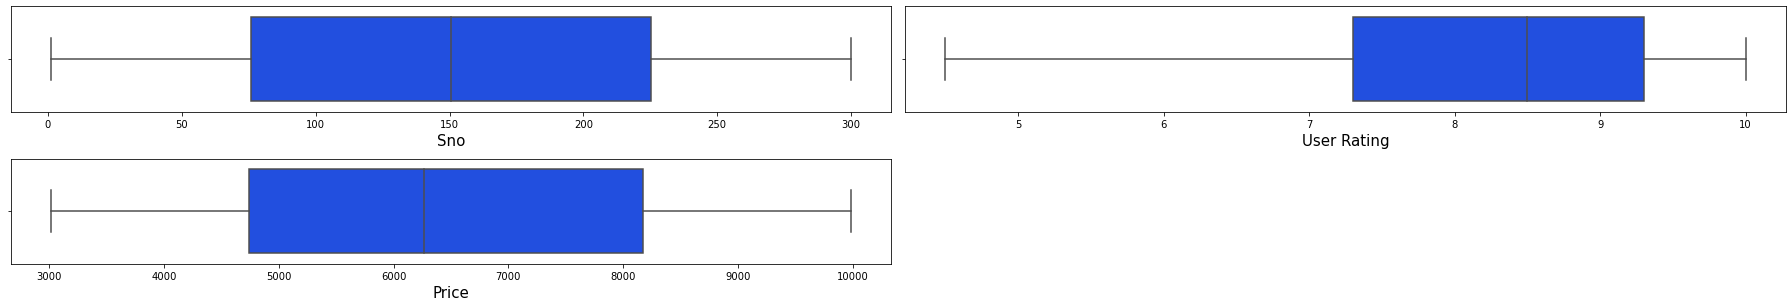

In [46]:
# lets check the outliers using boxplot
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=36:
        ax=plt.subplot(12,2,plotnumber)     
        sns.boxplot(df[col],palette='bright')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [47]:
# we can see that there are no outliers

## Checking Skewness 

In [48]:
df.skew()

Sno            0.000000
User Rating   -0.830520
Price          0.099044
dtype: float64

In [49]:
# the acceptable range for skewness-:
                    # 1)if its 0 the data is semetrical or normaly distriuted
                    # 2) acceptable range is -0.5 to 0.5 

In [50]:
import scipy.stats as stats
from scipy.stats import boxcox
import math

In [51]:
df['User Rating'],lambda_=stats.yeojohnson(df['User Rating'])

In [52]:
df.skew()

Sno            0.000000
User Rating   -0.146617
Price          0.099044
dtype: float64

In [53]:
# we can see that the skewness is removed 

In [54]:
# we will be dropping serial no column as it is of no use
# we will be dropping location column also as it is of no use
df=df.drop('Sno',axis=1)
df=df.drop('Location',axis=1)

In [55]:
df

,Hotel Name,City,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
0,MySquare Apartments Shoredtich,London,"· 7 reviews,",163.437221,No,No,No,-,-,No,No,-,-,-,Delux King Room,Yes,No,6765,Good
1,Daisy’s Place in London,London,"· 6 reviews,",422.218592,Yes,No,No,-,-,No,No,-,-,-,Standard Twin,Yes,No,5866,Superb
2,The Park Road Collection,London,· 15 reviews,175.926967,Yes,Yes,Yes,RestaurantSara Falafel,-,No,No,-,-,-,Standard Twin,No,Yes,3174,Good
3,Kennington retreat with garden + king bed,London,"· 10 reviews,",422.218592,Yes,Yes,Yes,-,-,No,No,-,-,-,Standard Twin,No,Yes,9218,Superb
4,Shepherds Bush Apartment,London,"· 17 reviews,",175.926967,No,No,No,-,-,No,No,-,-,-,Standard Double,Yes,No,8492,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Granz Okubo 1F,Tokyo,· 23 reviews,388.834470,No,No,No,-,-,No,No,-,-,-,Delux King Room,Yes,No,7744,Very Good
296,全新3居室！距离池袋C2出口5分钟！,Tokyo,"· 6 reviews,",232.200802,No,No,No,-,-,Yes,Yes,-,-,-,Delux King Room,No,Yes,5179,Very Good
297,Shinjuku Backyard for 4 guests,Tokyo,"· 10 reviews,",232.200802,No,No,No,-,-,Yes,No,-,-,-,Standard Twin,No,Yes,9279,Very Good
298,Shinjuku Central Apartment 203,Tokyo,"· 2 reviews,",422.218592,Yes,Yes,Yes,-,-,No,No,-,-,-,Delux King Room,No,Yes,4957,Superb


## Encoding 

In [56]:
# encoding/converting the categorical column using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Hotel Name,City,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
0,185.0,4.0,11.0,163.437221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6765,0.0
1,72.0,4.0,10.0,422.218592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,5866,2.0
2,264.0,4.0,3.0,175.926967,1.0,1.0,1.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,3174,0.0
3,151.0,4.0,1.0,422.218592,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,9218,2.0
4,222.0,4.0,4.0,175.926967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,8492,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,93.0,10.0,7.0,388.834470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7744,3.0
296,298.0,10.0,10.0,232.200802,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5179,3.0
297,223.0,10.0,1.0,232.200802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,9279,3.0
298,224.0,10.0,5.0,422.218592,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4957,2.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          300 non-null    float64
 1   City                300 non-null    float64
 2   No Of Reviews       300 non-null    float64
 3   User Rating         300 non-null    float64
 4   Free WIFI           300 non-null    float64
 5   Family Rooms        300 non-null    float64
 6   Non Smoking Rooms   300 non-null    float64
 7   Resturant           300 non-null    float64
 8   Bar                 300 non-null    float64
 9   Heating             300 non-null    float64
 10  Lift                300 non-null    float64
 11  Breakfast Cusine 1  300 non-null    float64
 12  Breakfast Cusine 2  300 non-null    float64
 13  Breakfast Cusine 3  300 non-null    float64
 14  Room Type           300 non-null    float64
 15  Single Bed          300 non-null    float64
 16  Double B

In [58]:
# now we will se the statistical summery of the data
df.describe()

,Hotel Name,City,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,5.496667,5.683333,260.113081,0.436667,0.453333,0.453333,5.080000,1.34000,0.240000,0.223333,0.586667,0.020000,0.003333,1.453333,0.523333,0.716667,6445.866667,1.836667
std,86.746758,3.453948,3.332678,101.220472,0.496801,0.498649,0.498649,12.434992,3.52123,0.427797,0.417176,2.417015,0.215456,0.057735,1.127857,0.500290,0.451370,2025.873023,1.362416
min,0.000000,0.000000,0.000000,53.355606,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3011.000000,0.000000
25%,74.750000,2.750000,3.000000,182.402224,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4738.000000,0.000000
50%,149.500000,5.500000,6.000000,272.800735,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6266.000000,3.000000
75%,224.250000,8.250000,9.000000,347.113125,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,8170.000000,3.000000
max,299.000000,11.000000,11.000000,422.218592,1.000000,1.000000,1.000000,53.000000,15.00000,1.000000,1.000000,15.000000,3.000000,1.000000,3.000000,1.000000,1.000000,9986.000000,3.000000


## Finding the correlation 

In [59]:
# checking te correlation
cor=df.corr()
cor

,Hotel Name,City,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price,Review Score
Hotel Name,1.000000,-0.064871,-0.010603,0.094586,-0.068565,-0.028994,-0.028994,0.017735,-0.103995,0.009193,0.059841,-0.120735,-0.029168,-0.077797,0.049396,0.014527,0.016699,-0.091614,0.127641
City,-0.064871,1.000000,-0.025515,-0.017540,-0.380195,-0.414678,-0.414678,-0.209852,-0.174251,0.217837,0.115413,-0.112740,-0.085300,-0.025101,0.047609,-0.046407,-0.031714,0.035204,-0.048801
No Of Reviews,-0.010603,-0.025515,1.000000,0.007109,0.029256,0.000134,0.000134,-0.074198,0.014905,0.020643,0.084716,0.007778,-0.093621,-0.046641,0.095265,-0.026645,0.064662,-0.036534,0.068122
User Rating,0.094586,-0.017540,0.007109,1.000000,-0.041191,-0.030741,-0.030741,0.068858,-0.091643,0.023719,0.008744,-0.099707,0.065871,0.061504,-0.065719,0.060433,-0.053199,0.016216,0.702131
Free WIFI,-0.068565,-0.380195,0.029256,-0.041191,1.000000,0.885815,0.885815,0.464784,0.291479,-0.494756,-0.472119,0.117390,-0.050618,-0.050916,-0.038121,0.019422,0.001740,-0.057610,-0.037570
Family Rooms,-0.028994,-0.414678,0.000134,-0.030741,0.885815,1.000000,1.000000,0.442889,0.418589,-0.511736,-0.488323,0.266987,0.102105,0.063506,-0.087140,0.037895,-0.006934,-0.053408,0.010896
Non Smoking Rooms,-0.028994,-0.414678,0.000134,-0.030741,0.885815,1.000000,1.000000,0.442889,0.418589,-0.511736,-0.488323,0.266987,0.102105,0.063506,-0.087140,0.037895,-0.006934,-0.053408,0.010896
Resturant,0.017735,-0.209852,-0.074198,0.068858,0.464784,0.442889,0.442889,1.000000,0.014195,-0.229955,-0.219433,-0.099490,-0.038049,-0.023665,-0.038126,0.018515,0.020736,-0.060284,0.041243
Bar,-0.103995,-0.174251,0.014905,-0.091643,0.291479,0.418589,0.418589,0.014195,1.000000,-0.214207,-0.204407,0.436648,0.043907,0.027309,-0.053256,0.088509,-0.183282,-0.002826,-0.074832
Heating,0.009193,0.217837,0.020643,0.023719,-0.494756,-0.511736,-0.511736,-0.229955,-0.214207,1.000000,0.504484,-0.136627,-0.052251,-0.032498,0.044085,-0.057507,0.024249,0.106191,-0.001377


The correlation range is fro -1 to +1, -1 represent higly negative correlated and +1 shows perfectly positive correlation

0 value represent no correlation

from -0.3 to +0.3 is considered as less correlation

from -0.3 to -0.5 and +0.3 to +0.5 is considered as moderate correlated, +ve and -ve respectively

0.5 to 0.7 is considered high positive correlated and -0.5 to -0.7 id considered high negative correlated

0.7 to 1 is considered very high positive correlated and -0.7 to -1 id considered very high negative correlated

## visualizing the correlation using heat map 

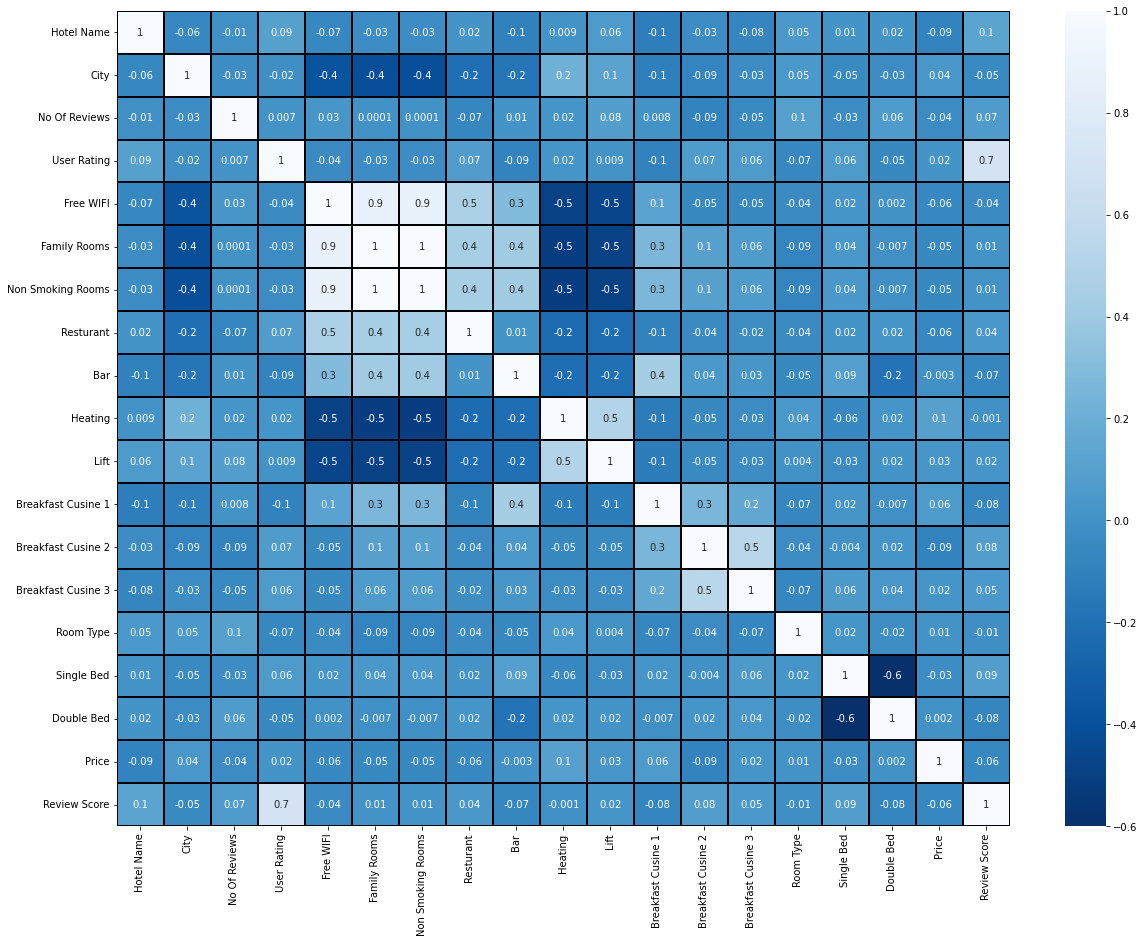

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidth=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r') # if we will not write annot=true it will not write values on the graph
plt.yticks(rotation=0);
plt.show()

In [61]:
cor['Review Score'].sort_values(ascending=False)

Review Score          1.000000
User Rating           0.702131
Hotel Name            0.127641
Single Bed            0.086572
Breakfast Cusine 2    0.079527
No Of Reviews         0.068122
Breakfast Cusine 3    0.049463
Resturant             0.041243
Lift                  0.023204
Family Rooms          0.010896
Non Smoking Rooms     0.010896
Heating              -0.001377
Room Type            -0.014771
Free WIFI            -0.037570
City                 -0.048801
Price                -0.063602
Bar                  -0.074832
Double Bed           -0.075506
Breakfast Cusine 1   -0.079477
Name: Review Score, dtype: float64

In [62]:
# correlation of review score

In [63]:
cor['Price'].sort_values(ascending=False)

Price                 1.000000
Heating               0.106191
Breakfast Cusine 1    0.056756
City                  0.035204
Lift                  0.030910
Breakfast Cusine 3    0.024023
User Rating           0.016216
Room Type             0.012290
Double Bed            0.001626
Bar                  -0.002826
Single Bed           -0.025109
No Of Reviews        -0.036534
Family Rooms         -0.053408
Non Smoking Rooms    -0.053408
Free WIFI            -0.057610
Resturant            -0.060284
Review Score         -0.063602
Breakfast Cusine 2   -0.090026
Hotel Name           -0.091614
Name: Price, dtype: float64

In [64]:
# correlation with price

## Visualization the relation between the taget variable and the features by using the bar plot

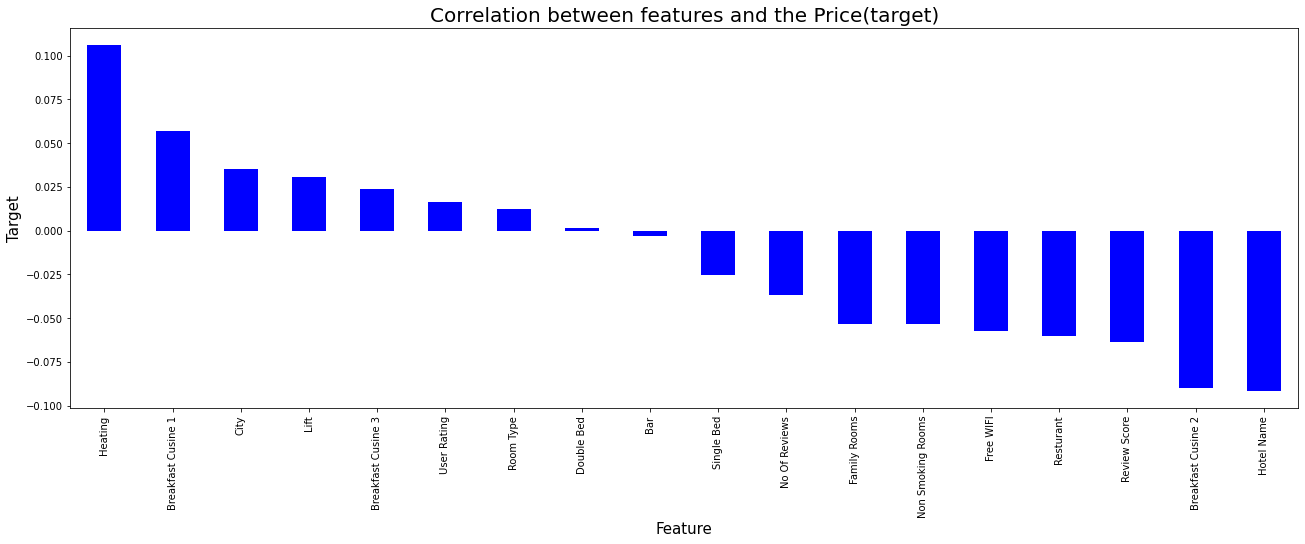

In [65]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar', color='b') # we are dropping the churn rate as we dont want to compare churn with churn
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between features and the Price(target)',fontsize=20)
plt.show()

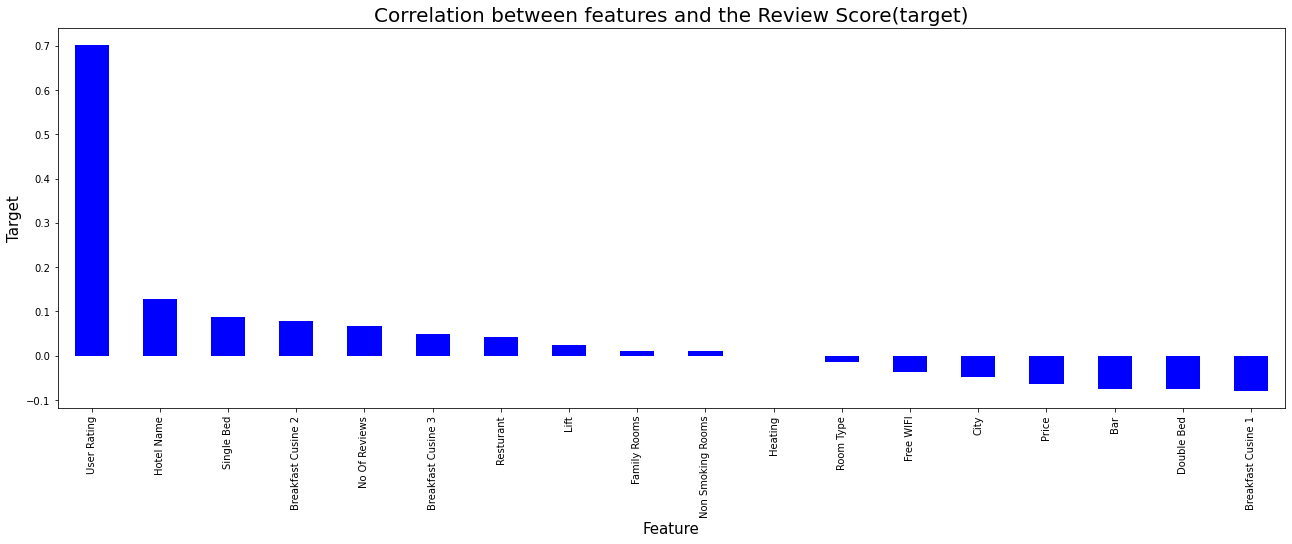

In [66]:
plt.figure(figsize=(22,7))
df.corr()['Review Score'].sort_values(ascending=False).drop(['Review Score']).plot(kind='bar', color='b') # we are dropping the churn rate as we dont want to compare churn with churn
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between features and the Review Score(target)',fontsize=20)
plt.show()

# Classification model 

##### Review Score 

In [67]:
x=df.drop(['Review Score'],axis=1)
y=df["Review Score"]

In [68]:
print("Feature dimensions:",x.shape)
print("Target dimensions:",y.shape)

Feature dimensions: (300, 18)
Target dimensions: (300,)


### Feature scaling using standard scalarisation 

In [69]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Hotel Name,City,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Price
0,0.409921,-0.434045,1.597979,-0.956698,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,0.954373,-1.590412,0.157792
1,-0.894898,-0.434045,1.297419,1.604185,1.135815,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,0.954373,-1.590412,-0.286709
2,1.322139,-0.434045,-0.806504,-0.833100,1.135815,1.098127,1.098127,3.376765,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,-1.617739
3,0.017321,-0.434045,-1.407624,1.604185,1.135815,1.098127,1.098127,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,1.370651
4,0.837163,-0.434045,-0.505943,-0.833100,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,0.485505,0.954373,-1.590412,1.011688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.652409,1.306001,0.395738,1.273818,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,0.954373,-1.590412,0.641848
296,1.714740,1.306001,1.297419,-0.276218,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,1.779513,1.864836,-0.243129,-0.092981,-0.057831,-1.290732,-1.047808,0.628768,-0.626388
297,0.848710,1.306001,-1.407624,-0.276218,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,1.779513,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,1.400812
298,0.860257,1.306001,-0.205383,1.604185,1.135815,1.098127,1.098127,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,-1.047808,0.628768,-0.736154


## Checking Variance Inflation Factor

In [70]:
#Checking Vif in every scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.077727,Hotel Name
1,1.253629,City
2,1.052634,No Of Reviews
3,1.052306,User Rating
4,5.849987,Free WIFI
5,inf,Family Rooms
6,inf,Non Smoking Rooms
7,1.389826,Resturant
8,1.553885,Bar
9,1.563323,Heating


In [71]:
y.value_counts()

3.0    160
0.0     97
2.0     28
1.0     15
Name: Review Score, dtype: int64

### Oversampling 

In [72]:
!pip install imblearn

In [73]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [74]:
y.value_counts()

0.0    160
2.0    160
3.0    160
1.0    160
Name: Review Score, dtype: int64

In [75]:
#Now the data is balanced now we can build machine learning Classification model

### Modelling

In [76]:
#Importing necessary libraries



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [77]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 1.0 at random_state 1


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

### Classification Algorithms

In [79]:
#Importing all the classification libraries

from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [80]:
#Checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

1.0
[[50  0  0  0]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 0  0  0 43]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [82]:
# my accuracy is 100%

In [83]:
#Checking accuracy for logistic regression model

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))

0.9895833333333334
[[50  0  0  0]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 0  0  2 41]]


In [84]:
# Accuracy is 98%

In [85]:
#Checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.953125
[[47  0  0  3]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 1  0  5 37]]
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        50
         1.0       1.00      1.00      1.00        46
         2.0       0.91      1.00      0.95        53
         3.0       0.93      0.86      0.89        43

    accuracy                           0.95       192
   macro avg       0.95      0.95      0.95       192
weighted avg       0.95      0.95      0.95       192



In [86]:
# accuracy is 95%

In [87]:
#Checking accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

1.0
[[50  0  0  0]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 0  0  0 43]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [88]:
# my accuracy is 100%

In [89]:
#Checking accuracy for Ada Boost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7395833333333334
[[ 0  0  0 50]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 0  0  0 43]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        53
         3.0       0.46      1.00      0.63        43

    accuracy                           0.74       192
   macro avg       0.62      0.75      0.66       192
weighted avg       0.62      0.74      0.66       192



In [90]:
# my accuracy is 73%

In [91]:
#Checking accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

1.0
[[50  0  0  0]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 0  0  0 43]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [92]:
# accuracy is 100%

In [93]:
#Checking accuracy for ExtraTrees Classifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

1.0
[[50  0  0  0]
 [ 0 46  0  0]
 [ 0  0 53  0]
 [ 0  0  0 43]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        46
         2.0       1.00      1.00      1.00        53
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [94]:
# accuracy is 100%

### Cross Validation Score 

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
#Checking cv score for Random Forest Classifier

score=cross_val_score(RFC,x,y) 
print(score)  #this will print the score 5 times one for each fold
print(score.mean())   #will takeout the mean for all those 5 scores
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predRFC)-score.mean()) 

[1.        0.9921875 1.        1.        0.9921875]
0.996875
Difference between Accuracy score and Cross validation score is: 0.0031250000000000444


In [97]:
#Checking cv score for Logistic Regression

score=cross_val_score(LR,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predLR)-score.mean())

[0.953125  0.953125  0.9921875 0.96875   0.90625  ]
0.9546875
Difference between Accuracy score and Cross validation score is: 0.03489583333333335


In [98]:
#Checking cv score for Gradient Boosting Classifier

score=cross_val_score(GB,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predGB)-score.mean()) 

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and Cross validation score is: 0.0


In [99]:
#Checking cv score for Support Vector Machine Classifier

score=cross_val_score(svc,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predsvc)-score.mean()) 

[0.953125  0.9375    0.96875   0.96875   0.9140625]
0.9484375
Difference between Accuracy score and Cross validation score is: 0.004687499999999956


In [100]:
#Checking cv score for Ada Boosting Classifier

score=cross_val_score(ABC,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predABC)-score.mean()) 

[0.75 0.75 0.75 0.75 0.75]
0.75
Difference between Accuracy score and Cross validation score is: -0.01041666666666663


In [101]:
#Checking cv score for Bagging Classifier

score=cross_val_score(BC,x,y)  
print(score)
print(score.mean())   
print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predBC)-score.mean()) 

[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score and Cross validation score is: 0.0


In [102]:
#Checking cv score for Extra Trees Classifier

score=cross_val_score(ET,x,y)  
print(score)
print(score.mean())   

print("Difference between Accuracy score and Cross validation score is:",accuracy_score(y_test,predET)-score.mean())

[0.9921875 0.9921875 0.9921875 0.9921875 0.9765625]
0.9890625
Difference between Accuracy score and Cross validation score is: 0.010937500000000044


In [103]:
# we will take Random forest classifier 

### Hyper Parameter Tuning 

In [104]:
!pip install sklearn.model

In [105]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'class_weight': [None, 'balanced']  # Weights for the classes
}

In [108]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [109]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [110]:
GCV.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [116]:
Final_model = RandomForestClassifier( class_weight='balanced', max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators=100)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


In [117]:
#Saving the model

In [118]:
#Saving the model using .pkl

import joblib
joblib.dump(Final_model,"Review Score.pkl")

['Review Score.pkl']

###  Predicting the saved model

In [119]:
#Lets load the saved model and get the predictions

model=joblib.load("Review Score.pkl")


#Prediction
prediction=model.predict(x_test)
prediction

array([0., 2., 2., 0., 2., 1., 1., 2., 2., 1., 2., 0., 3., 2., 2., 2., 3.,
       3., 1., 2., 3., 1., 1., 2., 2., 3., 2., 2., 2., 0., 2., 1., 3., 0.,
       3., 2., 0., 2., 1., 3., 2., 3., 2., 3., 0., 0., 3., 3., 2., 2., 0.,
       3., 0., 2., 3., 0., 3., 2., 3., 1., 0., 0., 2., 0., 3., 0., 2., 2.,
       1., 2., 1., 0., 3., 2., 3., 2., 3., 3., 1., 0., 1., 2., 3., 3., 3.,
       1., 2., 0., 3., 1., 0., 2., 3., 0., 1., 2., 1., 2., 2., 0., 0., 0.,
       2., 0., 2., 0., 1., 2., 1., 3., 1., 0., 1., 2., 2., 1., 0., 0., 0.,
       2., 1., 3., 1., 0., 2., 1., 3., 2., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 3., 0., 2., 0., 3., 1., 1., 1., 3., 3., 1., 1., 0., 1., 3.,
       0., 3., 3., 1., 0., 0., 0., 1., 3., 3., 3., 3., 1., 1., 0., 1., 1.,
       1., 0., 2., 3., 2., 0., 0., 2., 0., 2., 2., 3., 0., 2., 2., 0., 0.,
       1., 2., 3., 0., 0.])

# Regression model

#### Price 

## Seperating Features and Label

In [122]:
x=df.drop(['Price'],axis=1)
y=df["Price"]

In [123]:
print("Feature dimensions:",x.shape)
print("Target dimensions:",y.shape)

Feature dimensions: (300, 18)
Target dimensions: (300,)


### Feature scaling using standard scalarisation

In [124]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Hotel Name,City,No Of Reviews,User Rating,Free WIFI,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Review Score
0,0.409921,-0.434045,1.597979,-0.956698,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,0.954373,-1.590412,-1.350348
1,-0.894898,-0.434045,1.297419,1.604185,1.135815,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,0.954373,-1.590412,0.120085
2,1.322139,-0.434045,-0.806504,-0.833100,1.135815,1.098127,1.098127,3.376765,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,-1.350348
3,0.017321,-0.434045,-1.407624,1.604185,1.135815,1.098127,1.098127,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,0.120085
4,0.837163,-0.434045,-0.505943,-0.833100,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,0.485505,0.954373,-1.590412,-1.350348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.652409,1.306001,0.395738,1.273818,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,0.954373,-1.590412,0.855302
296,1.714740,1.306001,1.297419,-0.276218,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,1.779513,1.864836,-0.243129,-0.092981,-0.057831,-1.290732,-1.047808,0.628768,0.855302
297,0.848710,1.306001,-1.407624,-0.276218,-0.880425,-0.910642,-0.910642,-0.409207,-0.381185,1.779513,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,0.855302
298,0.860257,1.306001,-0.205383,1.604185,1.135815,1.098127,1.098127,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,-1.047808,0.628768,0.120085


In [125]:
#Checking Vif in every scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.073411,Hotel Name
1,1.254550,City
2,1.059099,No Of Reviews
3,2.030157,User Rating
4,5.926686,Free WIFI
5,inf,Family Rooms
6,inf,Non Smoking Rooms
7,1.389084,Resturant
8,1.557112,Bar
9,1.551693,Heating


VIF = 1: Indicates no multicollinearity. The predictor variable is not correlated with other variables in the model. VIF > 1 and VIF < 5: Suggests moderate multicollinearity. The predictor variable is moderately correlated with other variables. VIF >= 5: Indicates high multicollinearity. The predictor variable is highly correlated with other variables, and its coefficient estimates may be unreliable

In [126]:
# we will be dropping Free WIFI
x=x.drop('Free WIFI',axis=1)

In [127]:
x

,Hotel Name,City,No Of Reviews,User Rating,Family Rooms,Non Smoking Rooms,Resturant,Bar,Heating,Lift,Breakfast Cusine 1,Breakfast Cusine 2,Breakfast Cusine 3,Room Type,Single Bed,Double Bed,Review Score
0,0.409921,-0.434045,1.597979,-0.956698,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,0.954373,-1.590412,-1.350348
1,-0.894898,-0.434045,1.297419,1.604185,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,0.954373,-1.590412,0.120085
2,1.322139,-0.434045,-0.806504,-0.833100,1.098127,1.098127,3.376765,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,-1.350348
3,0.017321,-0.434045,-1.407624,1.604185,1.098127,1.098127,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,0.120085
4,0.837163,-0.434045,-0.505943,-0.833100,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,0.485505,0.954373,-1.590412,-1.350348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.652409,1.306001,0.395738,1.273818,-0.910642,-0.910642,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,0.954373,-1.590412,0.855302
296,1.714740,1.306001,1.297419,-0.276218,-0.910642,-0.910642,-0.409207,-0.381185,1.779513,1.864836,-0.243129,-0.092981,-0.057831,-1.290732,-1.047808,0.628768,0.855302
297,0.848710,1.306001,-1.407624,-0.276218,-0.910642,-0.910642,-0.409207,-0.381185,1.779513,-0.536240,-0.243129,-0.092981,-0.057831,1.373623,-1.047808,0.628768,0.855302
298,0.860257,1.306001,-0.205383,1.604185,1.098127,1.098127,-0.409207,-0.381185,-0.561951,-0.536240,-0.243129,-0.092981,-0.057831,-1.290732,-1.047808,0.628768,0.120085


In [128]:
#Checking Vif in every scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,1.051491,Hotel Name
1,1.248779,City
2,1.054469,No Of Reviews
3,2.022991,User Rating
4,inf,Family Rooms
5,inf,Non Smoking Rooms
6,1.376099,Resturant
7,1.528137,Bar
8,1.539673,Heating
9,1.531317,Lift


## Modelling 

In [129]:
#Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

### Creating train test split 

In [133]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is:",maxAccu,"on random state",maxRS)

Maximum R2 score is: 0.07263038971530011 on random state 129


In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS) 

In [135]:
#Importing all the regressor models

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [136]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_LR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score: -0.08698342300433559
R2 score on training data: 9.201352929366035
Mean Absolute Error: 2018.5995019663385
Mean Squared Error: 5109924.308635454
Root Mean Squared Error: 2260.514169085311


In [137]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_RFR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score: 0.00478708444802356
R2 score on training data: 82.55868641686914
Mean Absolute Error: 1900.4816666666663
Mean Squared Error: 4678509.866683333
Root Mean Squared Error: 2162.9863306741754


In [138]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score:",r2_score(y_test,pred_knn))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_knn))
print("Mean Squared Error:",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score: -0.11438627868838958
R2 score on training data: 13.947889011536475
Mean Absolute Error: 1997.6222222222223
Mean Squared Error: 5238745.517333333
Root Mean Squared Error: 2288.8306004012907


In [139]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print("R2 score:",r2_score(y_test,pred_GBR))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared Error:",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 score: -0.15385428727715644
R2 score on training data: 71.34297744726132
Mean Absolute Error: 2005.07814483188
Mean Squared Error: 5424285.1789629
Root Mean Squared Error: 2329.0094845154454


In [140]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print("R2 score:",r2_score(y_test,pred_lasso))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared Error:",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 score: -0.08612997442347092
R2 score on training data: 9.20057880843287
Mean Absolute Error: 2018.000078406887
Mean Squared Error: 5105912.234893356
Root Mean Squared Error: 2259.626569788326


In [141]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print("R2 score:",r2_score(y_test,pred_rd))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_rd))
print("Mean Squared Error:",mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2 score: -0.08574781857770897
R2 score on training data: 9.200419245406554
Mean Absolute Error: 2017.7936911256086
Mean Squared Error: 5104115.714905454
Root Mean Squared Error: 2259.229008955368


In [142]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_svr))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_svr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 score: -0.02235537966160739
R2 score on training data: -1.1135940835616642
Mean Absolute Error: 1966.5177284638219
Mean Squared Error: 4806106.970939739
Root Mean Squared Error: 2192.283506059319


In [143]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print("R2 score:",r2_score(y_test,pred_etr))
print("R2 score on training data:",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_etr))
print("Mean Squared Error:",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 score: -0.11140308852906822
R2 score on training data: 100.0
Mean Absolute Error: 1973.669222222222
Mean Squared Error: 5224721.498576666
Root Mean Squared Error: 2285.76497010884


In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_LR)-score.mean())*100)

[-0.0553372  -0.04490185 -0.36493714 -0.11794067 -0.0870374 ]
-0.13403085228612938
Difference between R2 score and CVS is: 4.704742928179378


In [146]:
score=cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_RFR)-score.mean())*100)

[-0.0697882  -0.05380941 -0.22865801 -0.16595482 -0.02483504]
-0.10860909490172928
Difference between R2 score and CVS is: 11.339617934975283


In [147]:
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_knn)-score.mean())*100)

[-0.24156735 -0.26256877 -0.22096776 -0.19117455 -0.12270696]
-0.20779707848318738
Difference between R2 score and CVS is: 9.34107997947978


In [148]:
score=cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_GBR)-score.mean())*100)

[-0.44793259 -0.10510104 -0.60435064 -0.20325142 -0.19736714]
-0.3116005651592599
Difference between R2 score and CVS is: 15.774627788210344


In [149]:
score=cross_val_score(lasso,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_lasso)-score.mean())*100)

[-0.05401989 -0.04470889 -0.34640223 -0.11808618 -0.08590038]
-0.1298235142164507
Difference between R2 score and CVS is: 4.369353979297977


In [150]:
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_rd)-score.mean())*100)

[-0.05458173 -0.04462622 -0.31883778 -0.1176741  -0.08540515]
-0.12422499334734045
Difference between R2 score and CVS is: 3.847717476963149


In [151]:
score=cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_svr)-score.mean())*100)

[-0.02730572 -0.06797331 -0.00054245 -0.02112465 -0.02292909]
-0.027975043141356792
Difference between R2 score and CVS is: 0.5619663479749404


In [152]:
score=cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and CVS is:",(r2_score(y_test,pred_etr)-score.mean())*100)

[-0.24742192 -0.11237597 -0.25243434 -0.17977119 -0.31651255]
-0.22170319322252435
Difference between R2 score and CVS is: 11.030010469345614


In [153]:
# we will take Ridge regression

### HyperParameter tuning 

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
param= {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (for 'poly' kernel)
    'gamma': ['scale', 'auto'] + [0.01, 0.1, 1.0, 10.0],  # Kernel coefficient
}

In [169]:
# Create a GridSearchCV object
gscv = GridSearchCV(SVR(), param, cv=5)

In [170]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1.0, 10.0],
                         'kernel': ['linear', 'rbf', 'poly']})

In [171]:
gscv.best_params_

{'C': 10.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [174]:
Model = SVR(C=10.0, kernel='poly', degree=4, gamma='scale')

In [175]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 score:",r2_score(y_test,pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

R2 score: -0.028045459478824197
Mean Absolute Error: 1970.0006773211799
Mean Squared Error: 4832856.115922749
Root Mean Squared Error: 2198.3757904240915


In [176]:
import pickle
filename='Price.pkl'
pickle.dump(Model,open(filename, 'wb'))  #saved model

In [177]:
#loading the model

loaded_model=pickle.load(open('Price.pkl','rb'))  #read binary mode
result=loaded_model.score(x_test,y_test)
print(result*100)

-2.8045459478824197


In [178]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","original"])   
conclusion

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Predicted,6193.249785,6195.585319,6192.938762,6192.995609,6193.347625,6193.96053,6192.560445,6194.508354,6192.543476,6192.41621,...,6192.293756,6192.921945,6184.796648,6195.7931,6188.201747,6194.182695,6192.158762,6192.583303,6190.782795,6192.051207
original,3125.000000,8803.000000,8238.000000,4815.000000,9536.000000,9279.00000,3848.000000,4444.000000,7061.000000,5669.00000,...,3540.000000,8169.000000,3229.000000,7267.0000,9839.000000,4860.000000,7975.000000,4662.000000,9859.000000,3651.000000
